In [12]:
import awkward as ak
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from cycler import cycler
import mplhep as hep

import hist
from hist import Hist

from topcoffea.modules.histEFT import HistEFT

from topcoffea.modules import utils
import topcoffea.modules.eft_helper as efth

In [2]:
f_ttbar = "TT01j2l_EFT_2017_CR.pkl.gz"
f_data = "DATA_2017_CR.pkl.gz"
f_background = "MC_BACKGROUND_2017_CR.pkl.gz"

hists_ttbar = utils.get_hist_from_pkl(f_ttbar, allow_empty=False)
hists_data = utils.get_hist_from_pkl(f_data, allow_empty=False)
hists_background = utils.get_hist_from_pkl(f_background, allow_empty=False)

# f_test = "TT01j2l_EFT_test.pkl.gz"
# hists = utils.get_hist_from_pkl(f_test, allow_empty=False)

In [4]:
# h=hists_data[name][{'process':sum}].as_hist({})[{'channel':ch}]
# h.axes.centers

In [5]:
channels = ['ee', 'mm']

/tmp/ipykernel_3580169/777546291.py:18: RuntimeWarning: invalid value encountered in divide
  ratio = np.divide(h_data.values(), total_background.values())
/afs/crc.nd.edu/user/h/hnelson2/micromamba/envs/ttbarEFT/lib/python3.10/site-packages/mplhep/utils.py:483: RuntimeWarning: invalid value encountered in sqrt
  return values - np.sqrt(variances), values + np.sqrt(variances)
/afs/crc.nd.edu/user/h/hnelson2/micromamba/envs/ttbarEFT/lib/python3.10/site-packages/mplhep/utils.py:483: RuntimeWarning: invalid value encountered in sqrt
  return values - np.sqrt(variances), values + np.sqrt(variances)
/tmp/ipykernel_3580169/777546291.py:18: RuntimeWarning: invalid value encountered in divide
  ratio = np.divide(h_data.values(), total_background.values())
/afs/crc.nd.edu/user/h/hnelson2/micromamba/envs/ttbarEFT/lib/python3.10/site-packages/mplhep/utils.py:483: RuntimeWarning: invalid value encountered in sqrt
  return values - np.sqrt(variances), values + np.sqrt(variances)
/tmp/ipykernel_3580

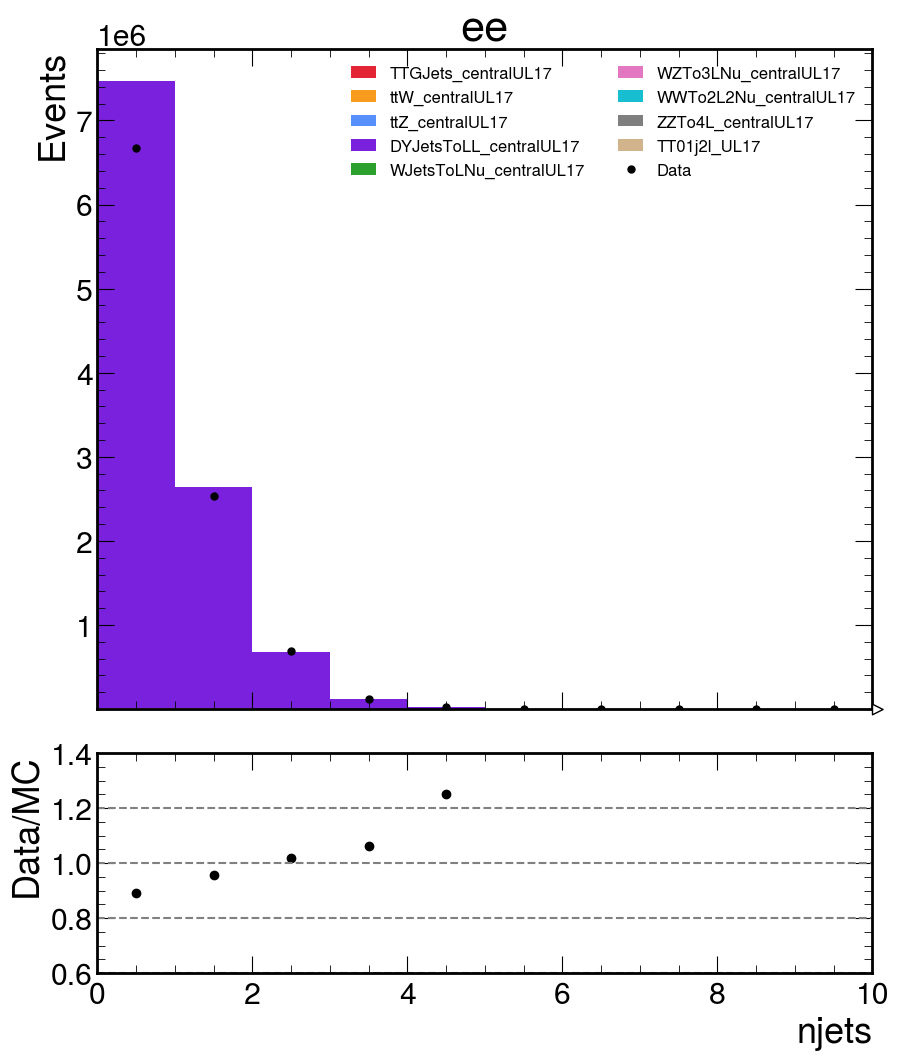

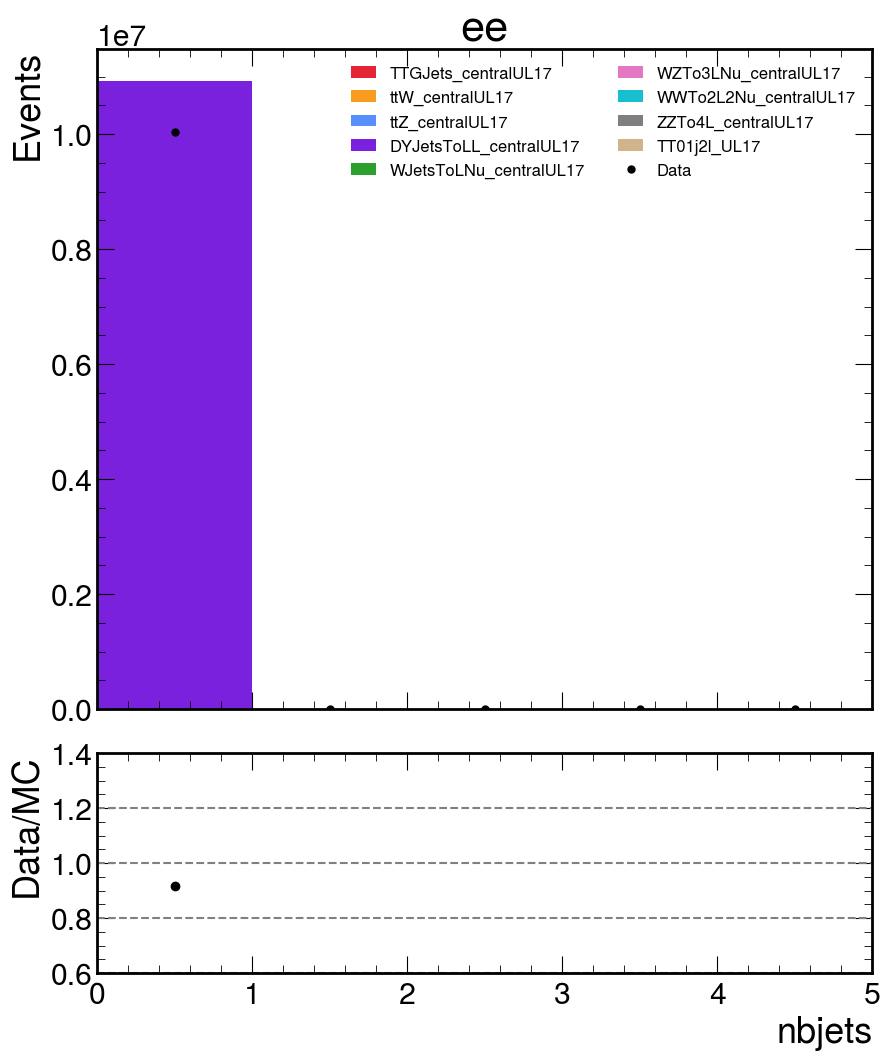

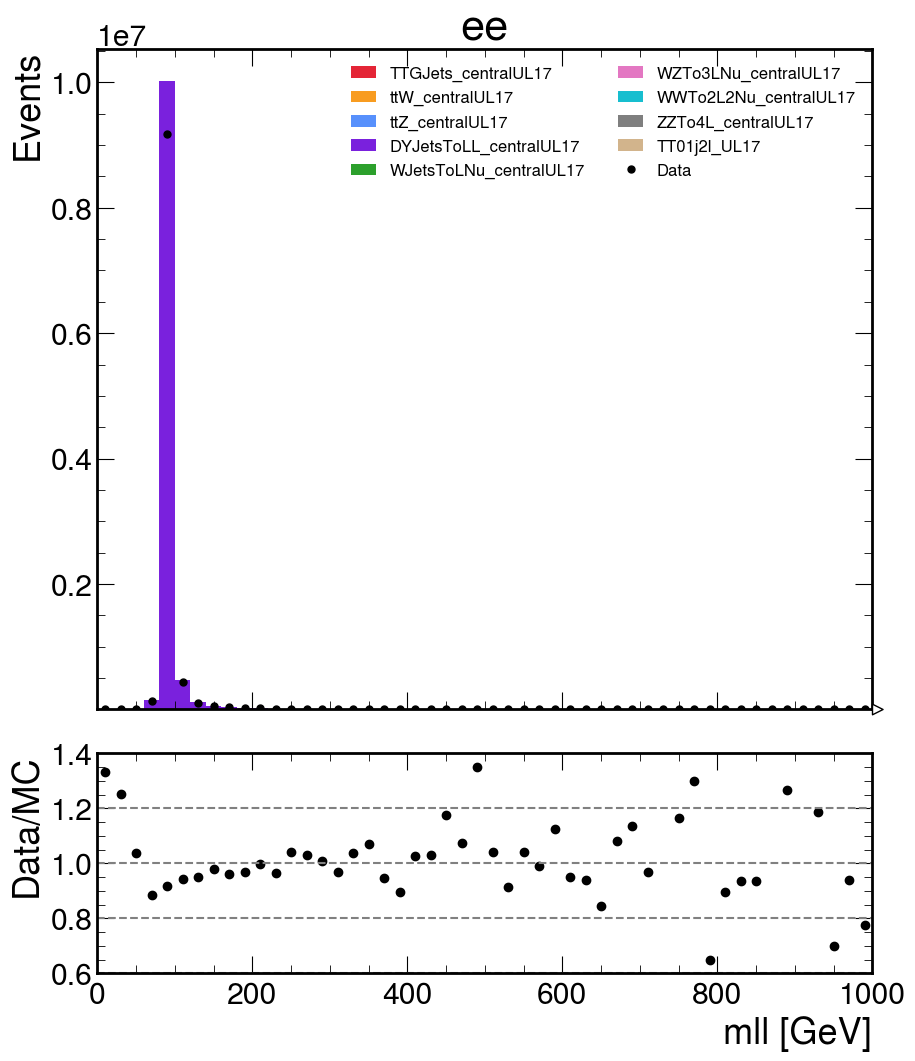

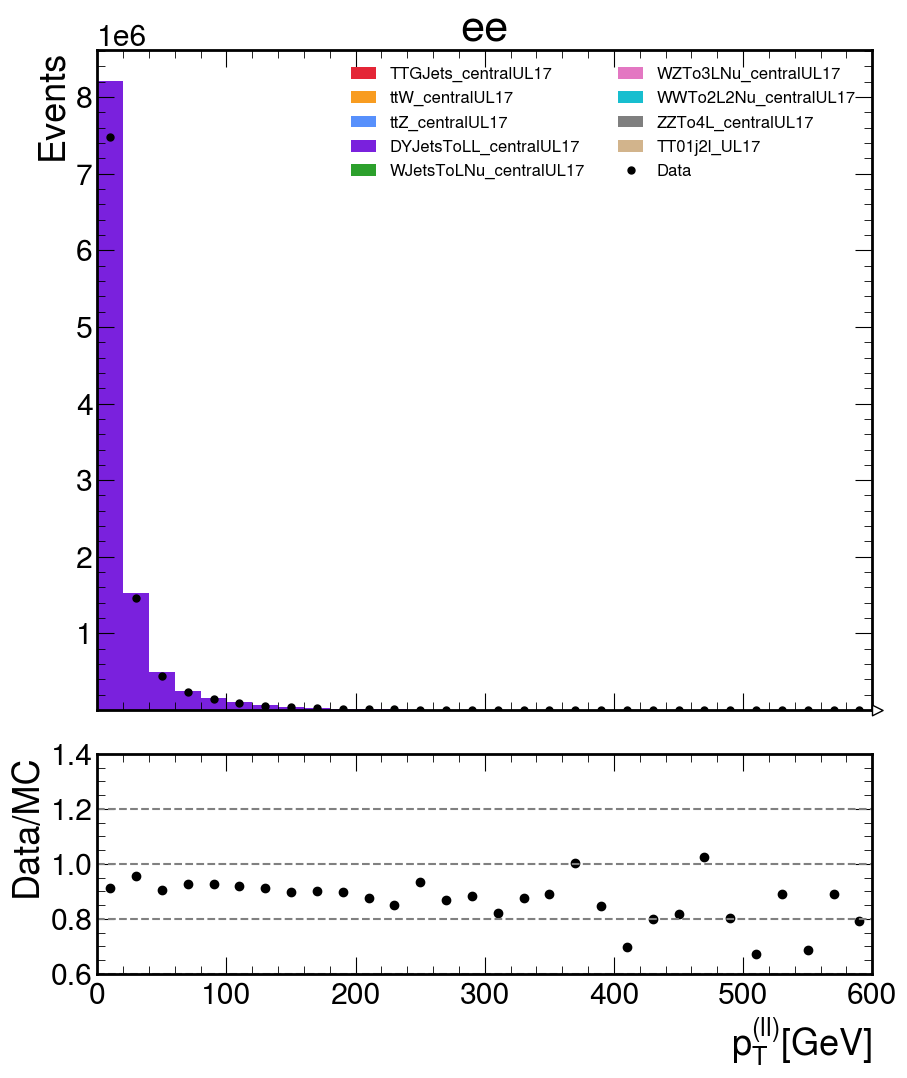

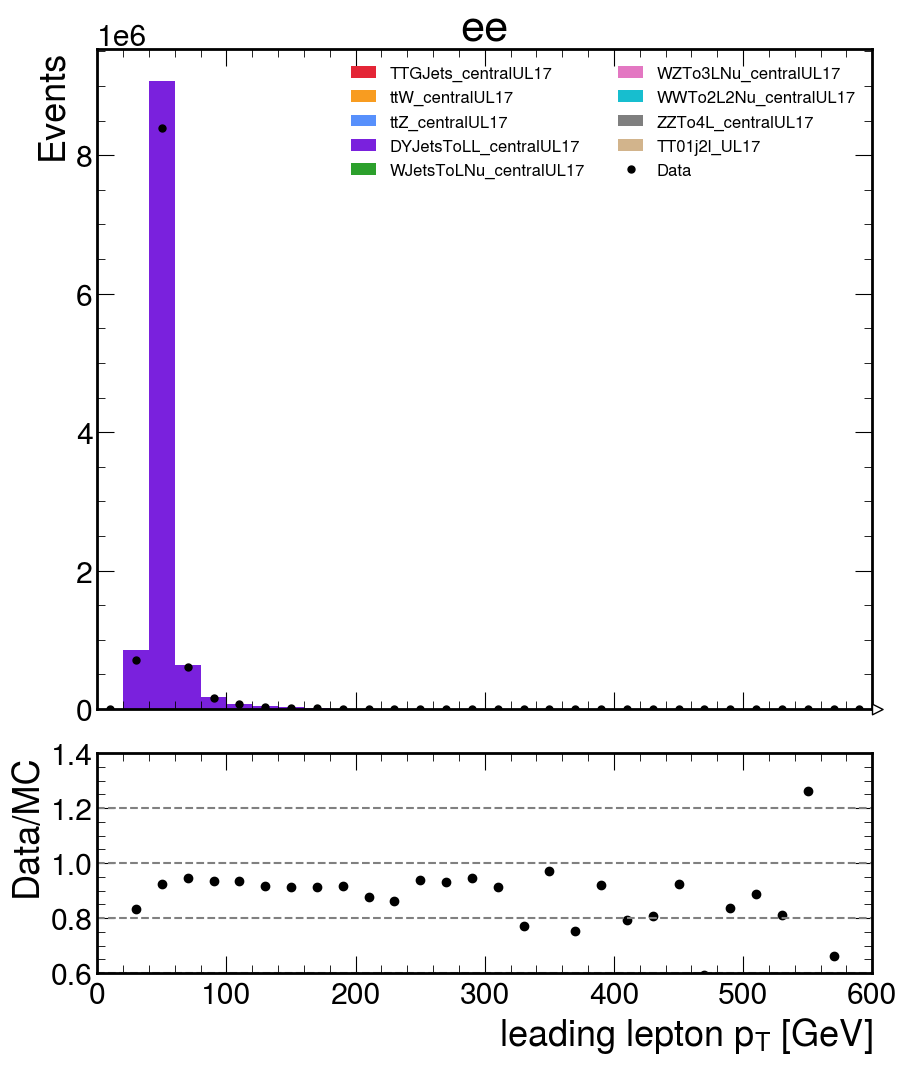

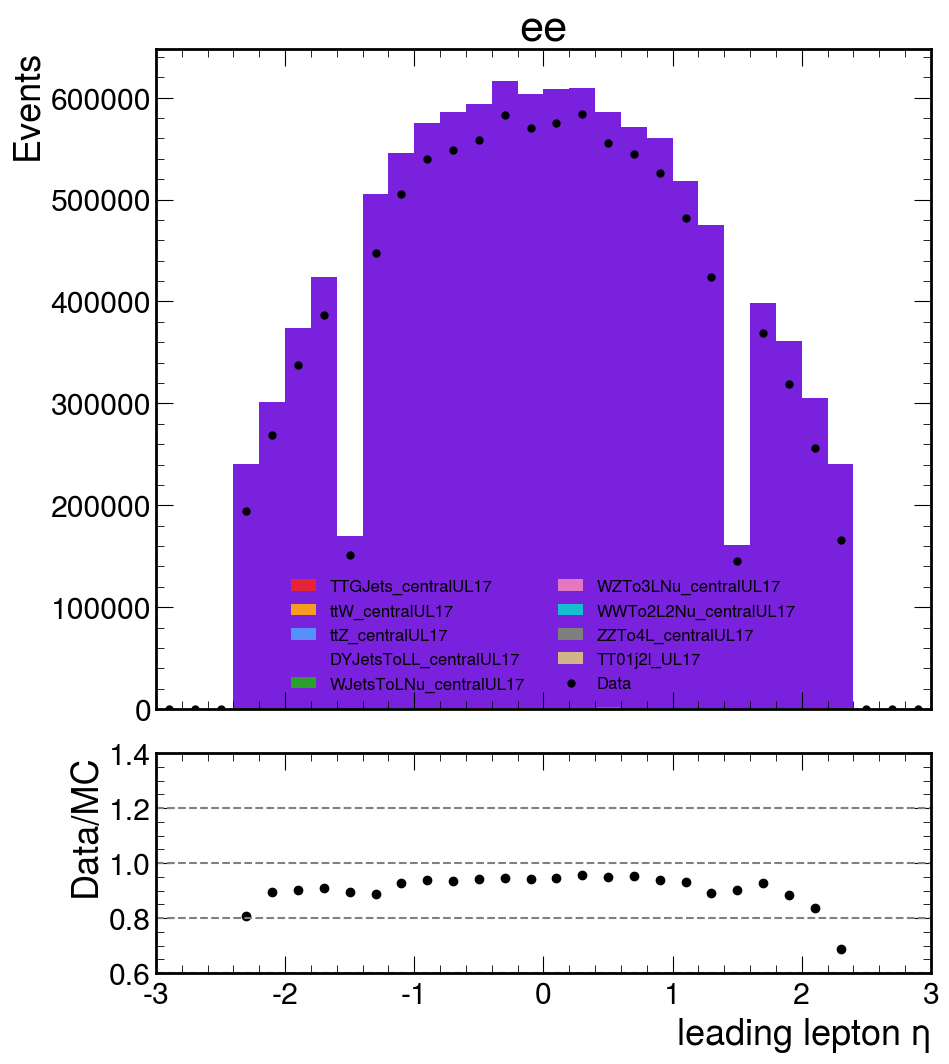

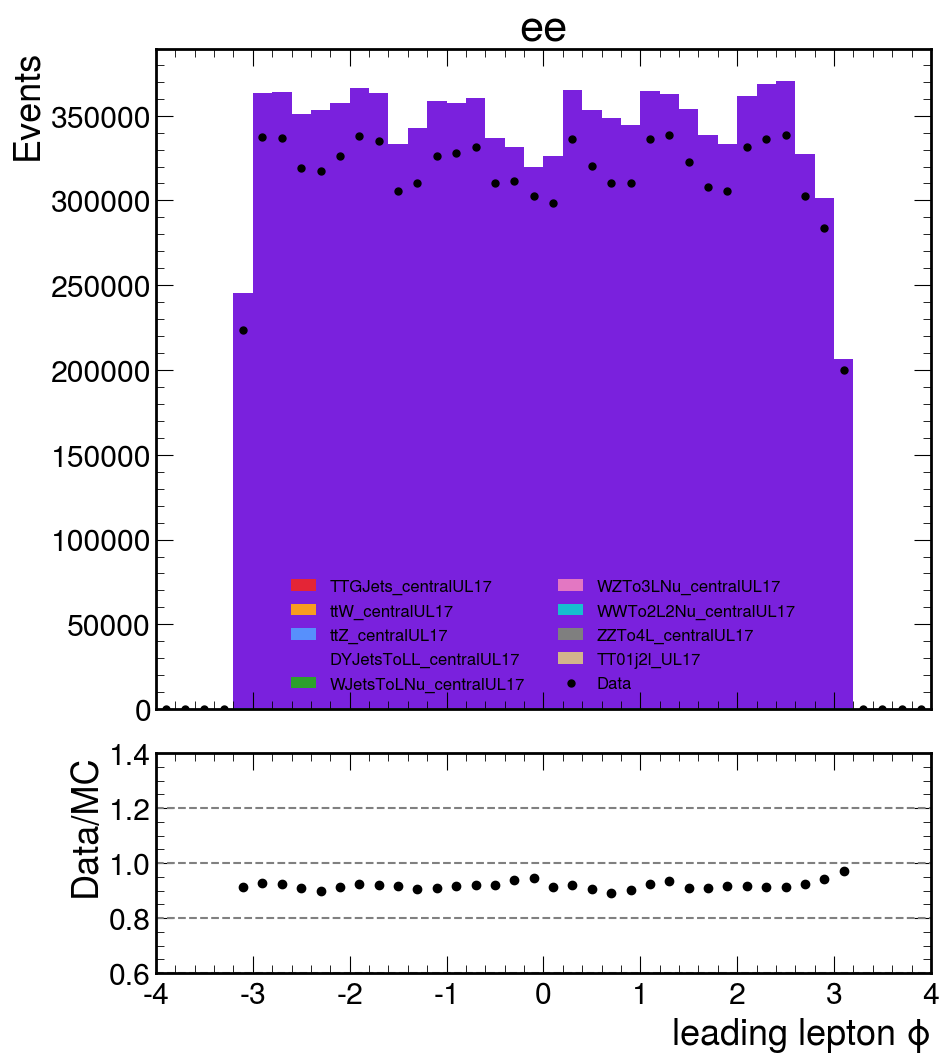

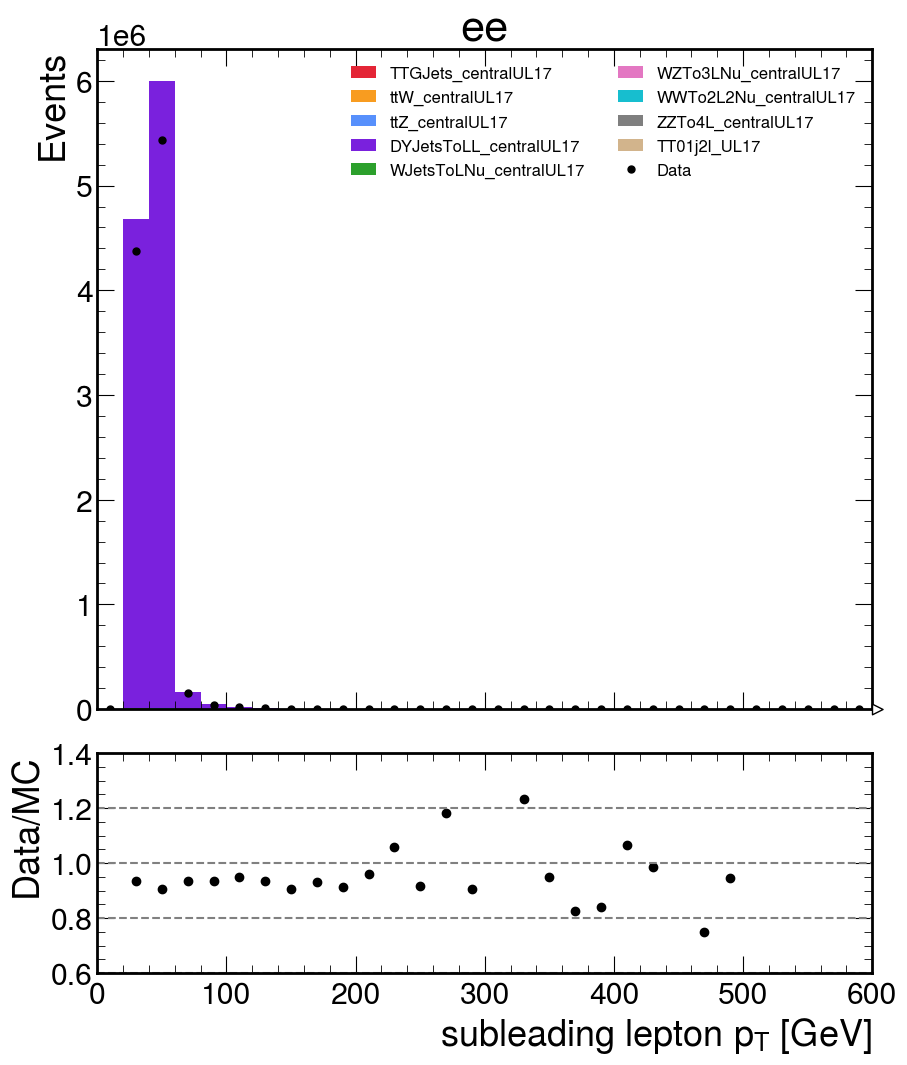

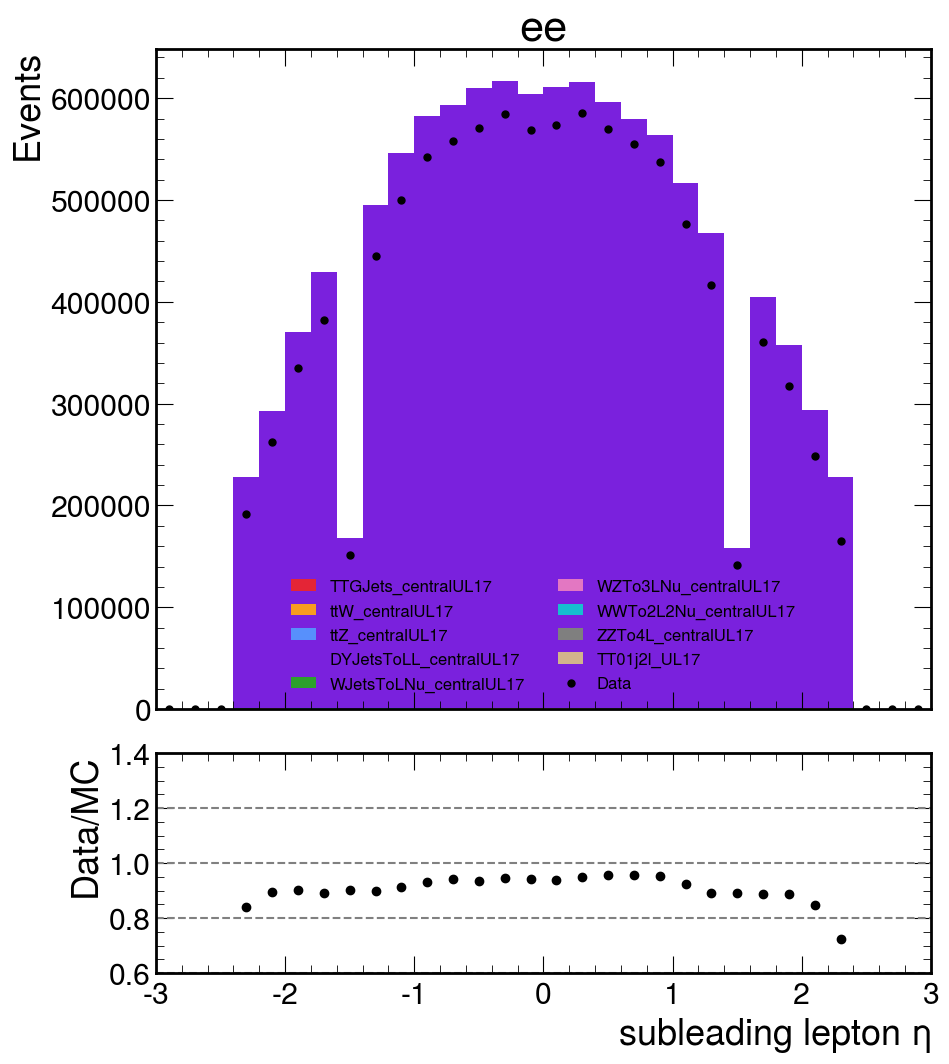

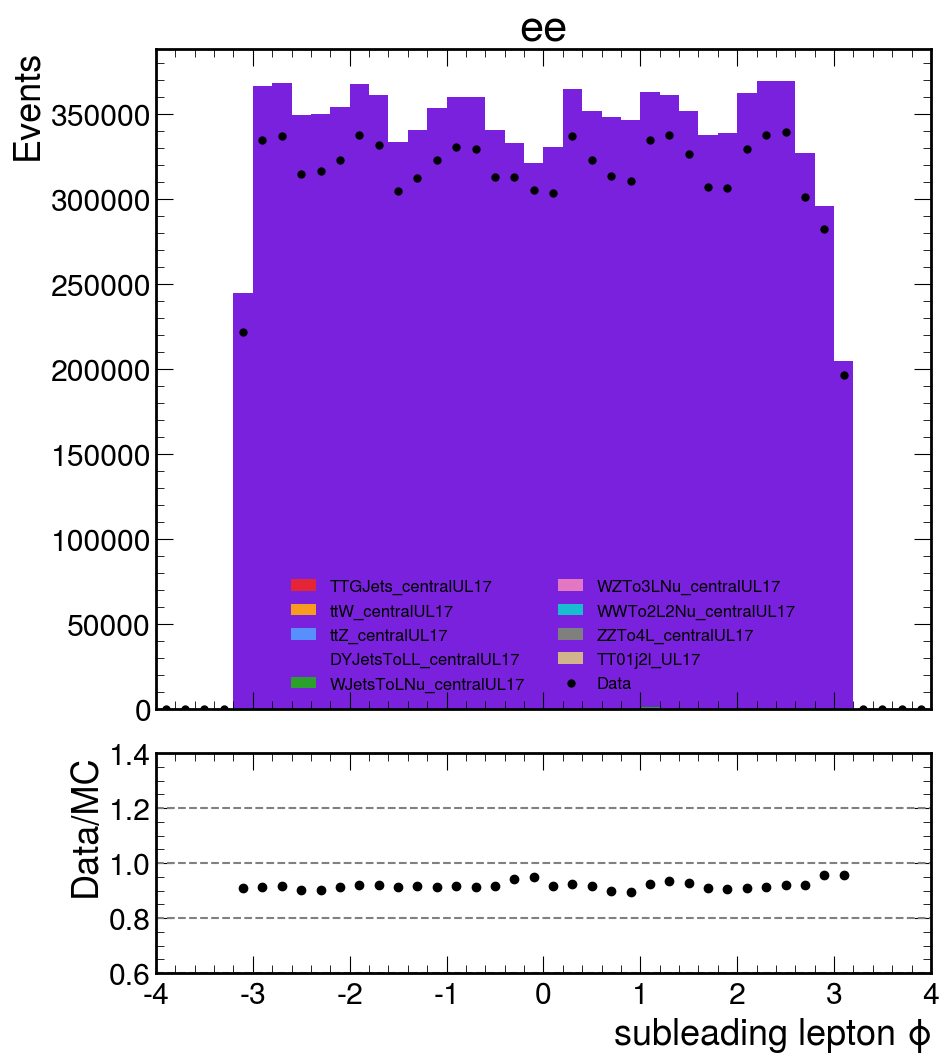

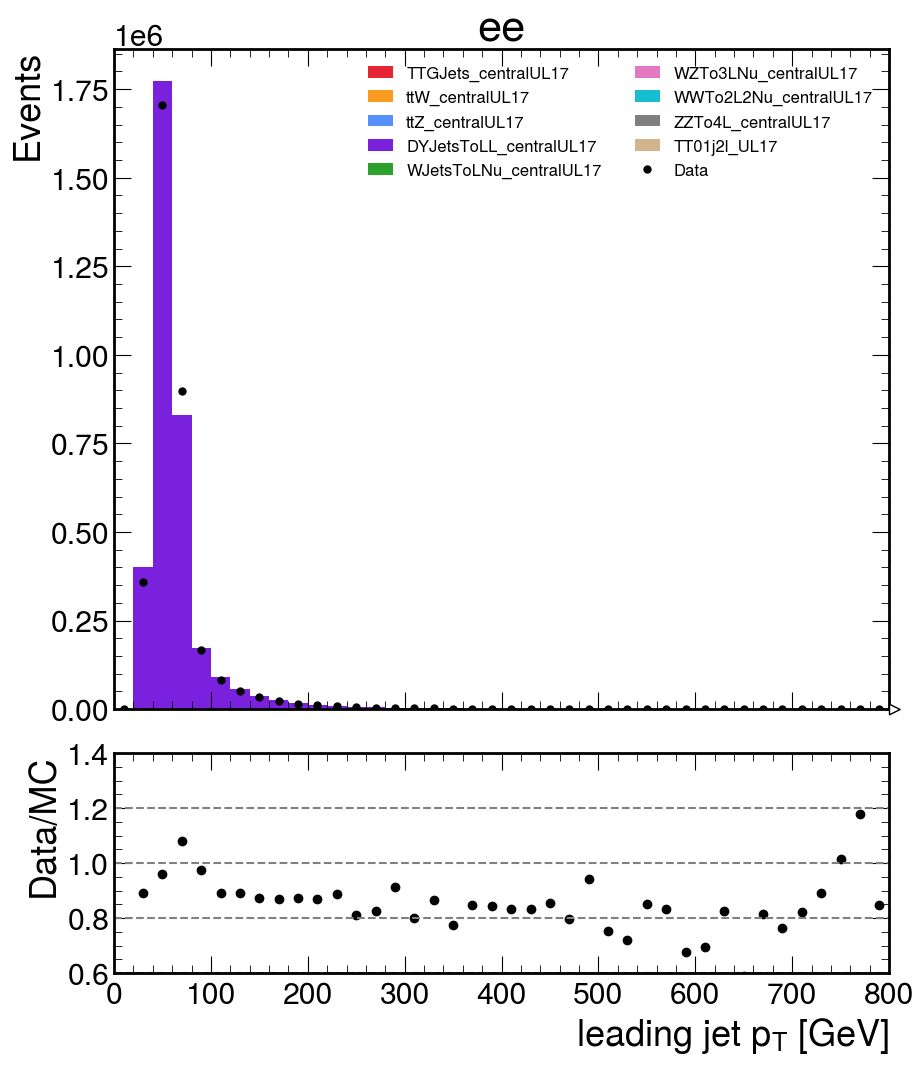

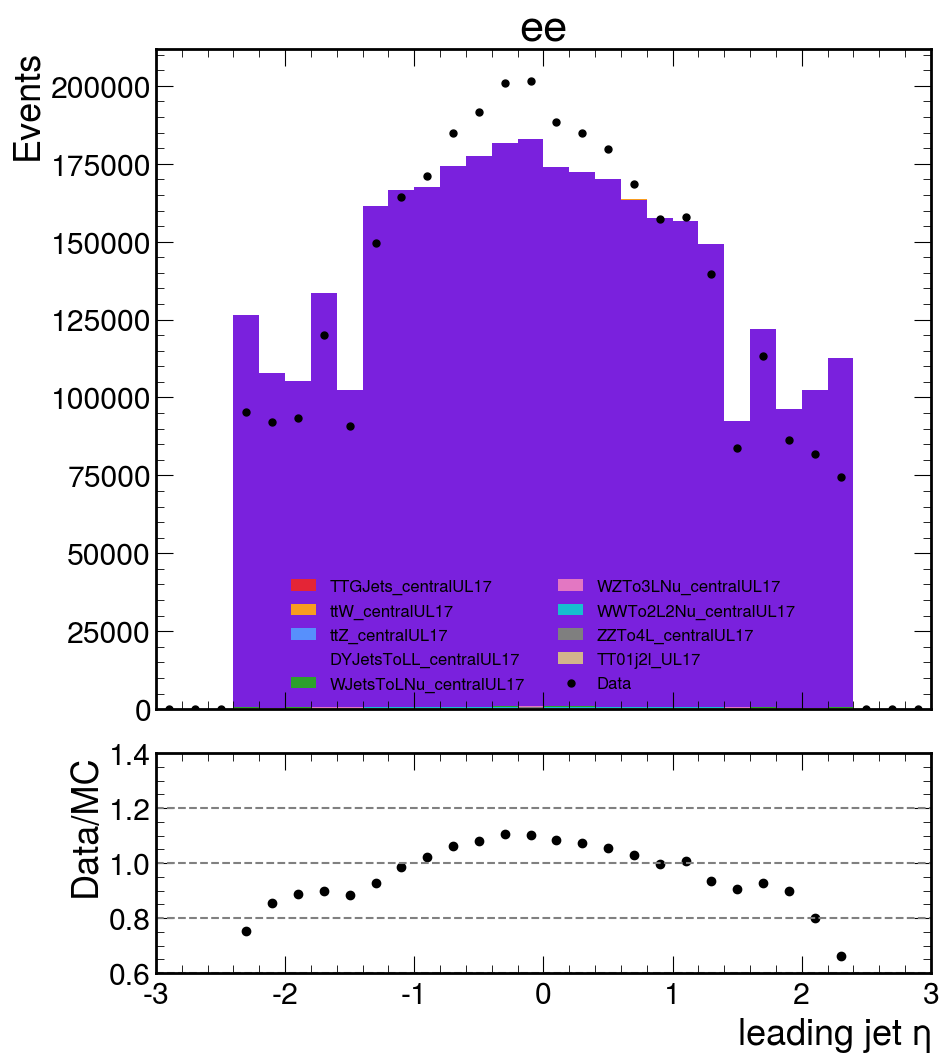

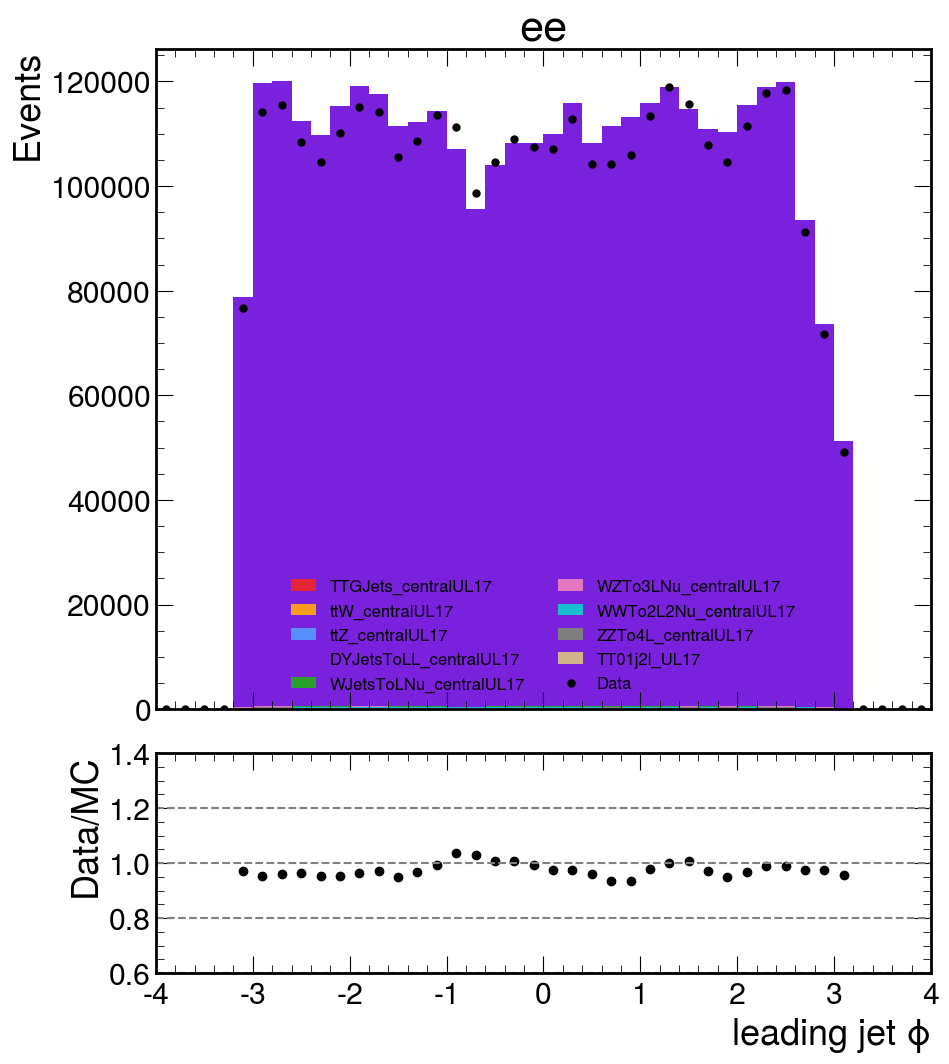

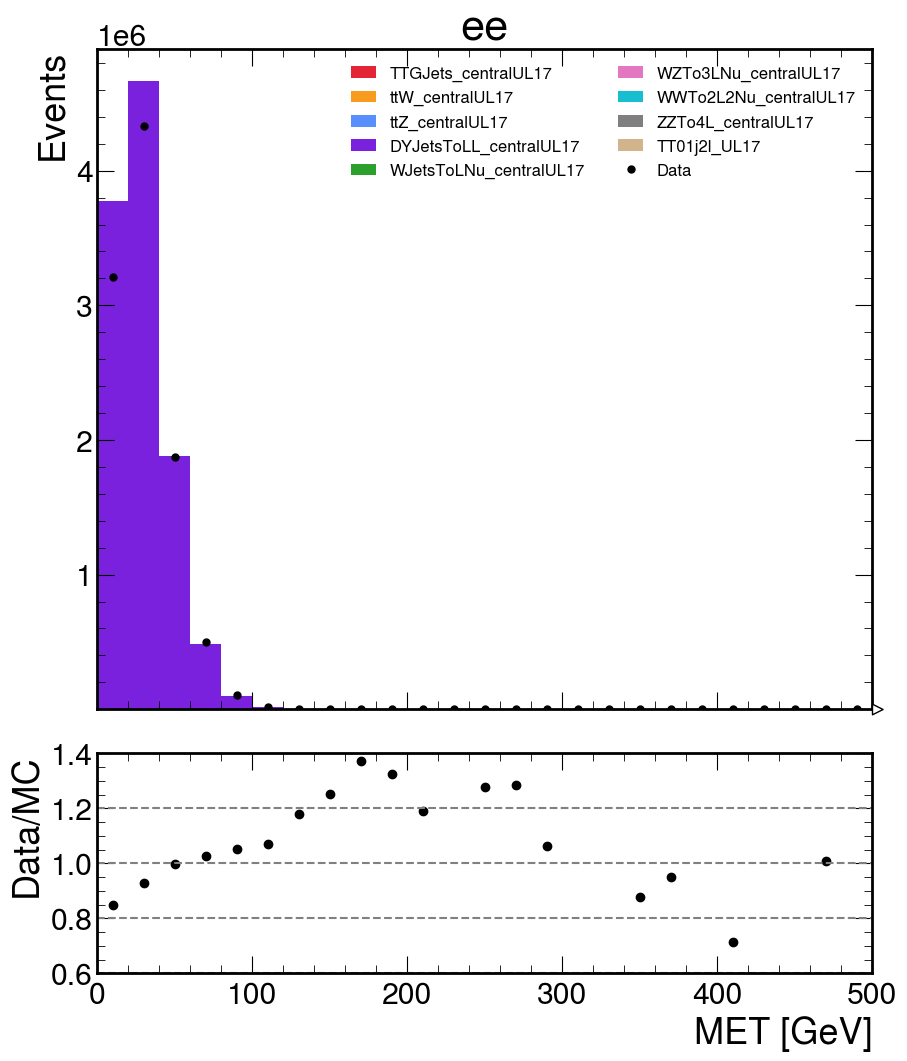

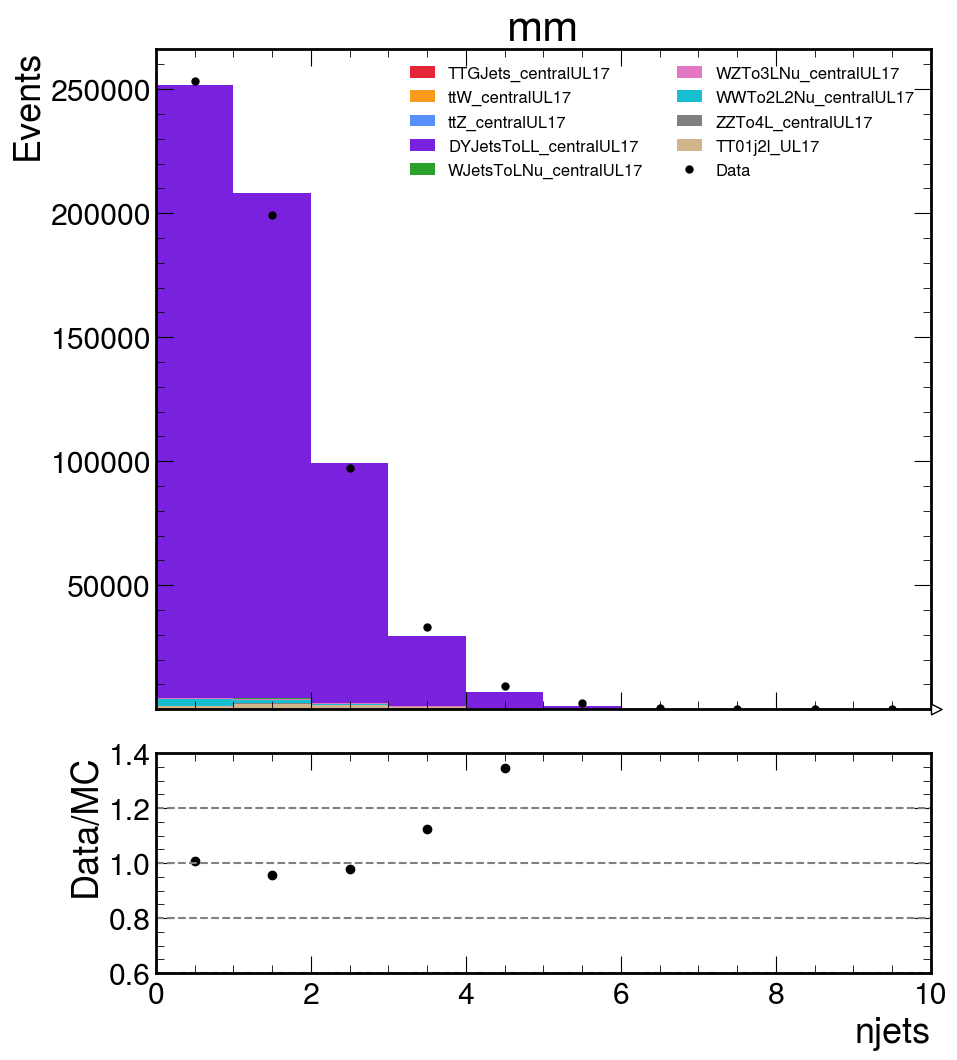

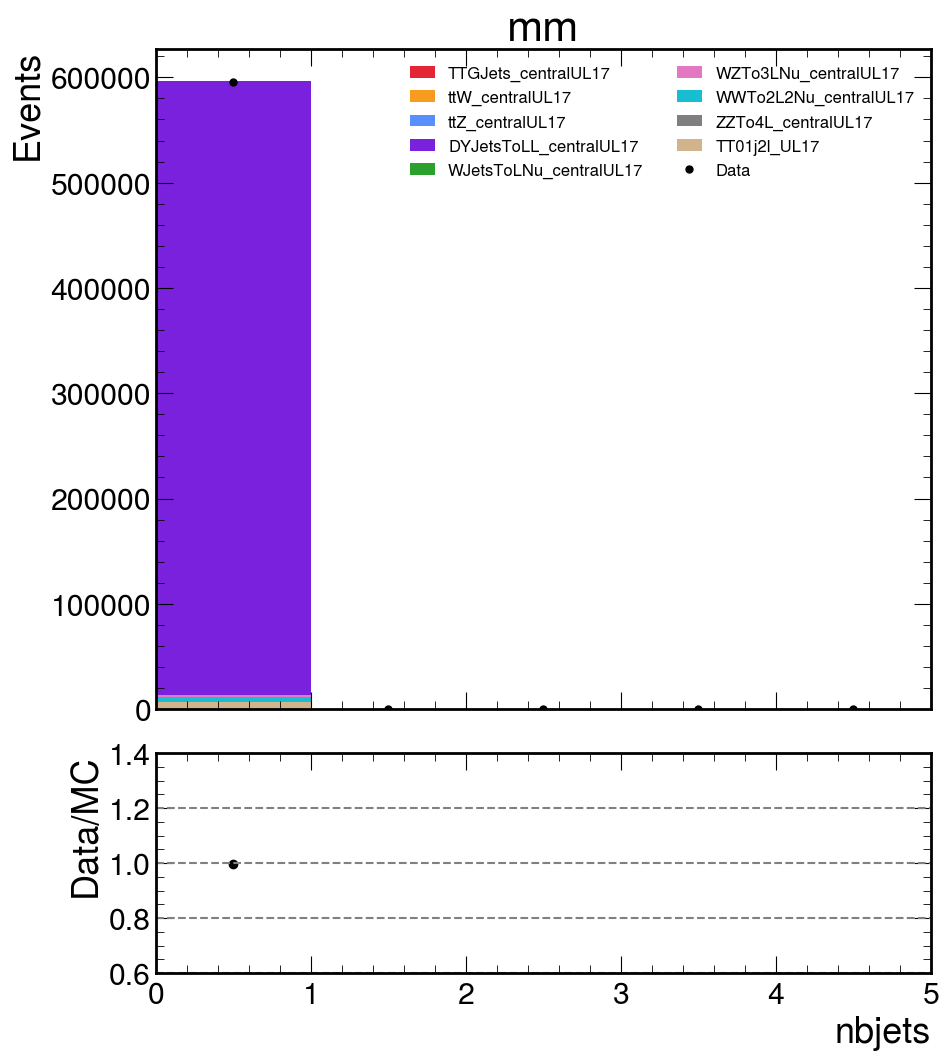

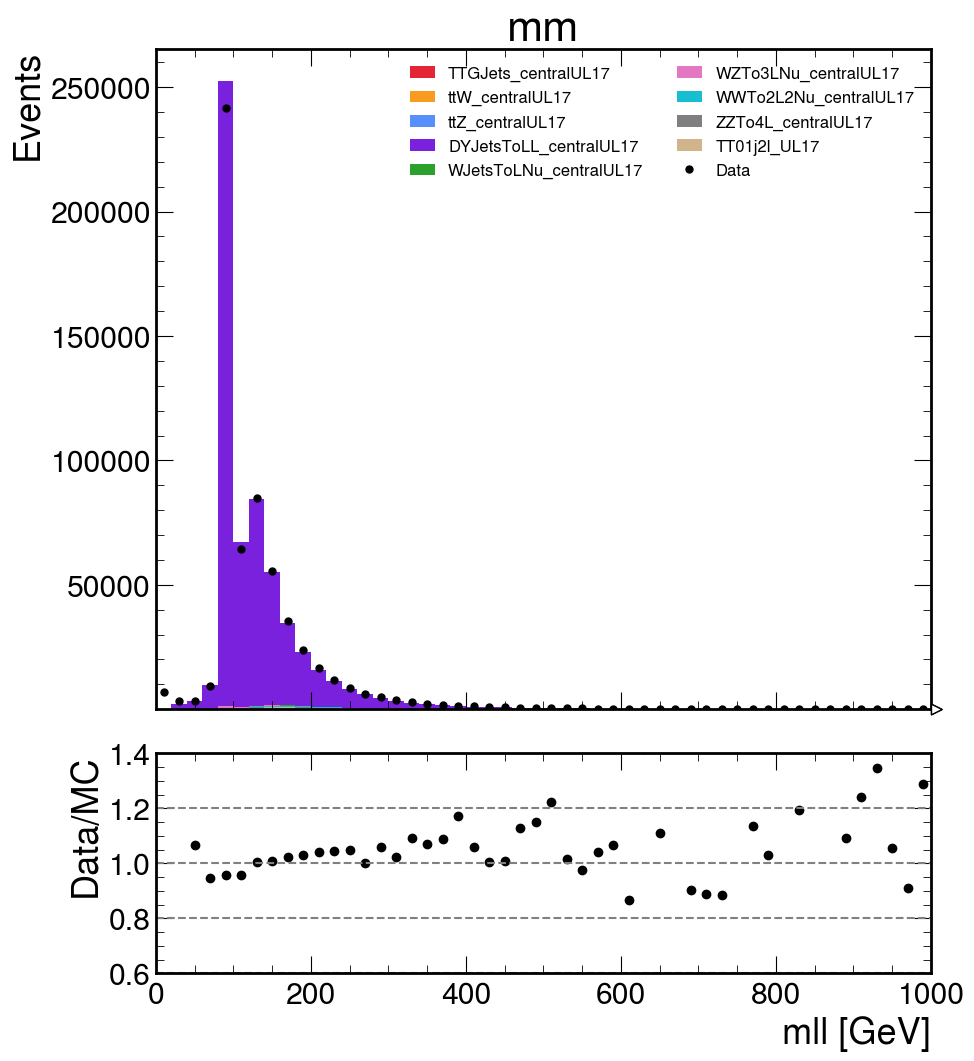

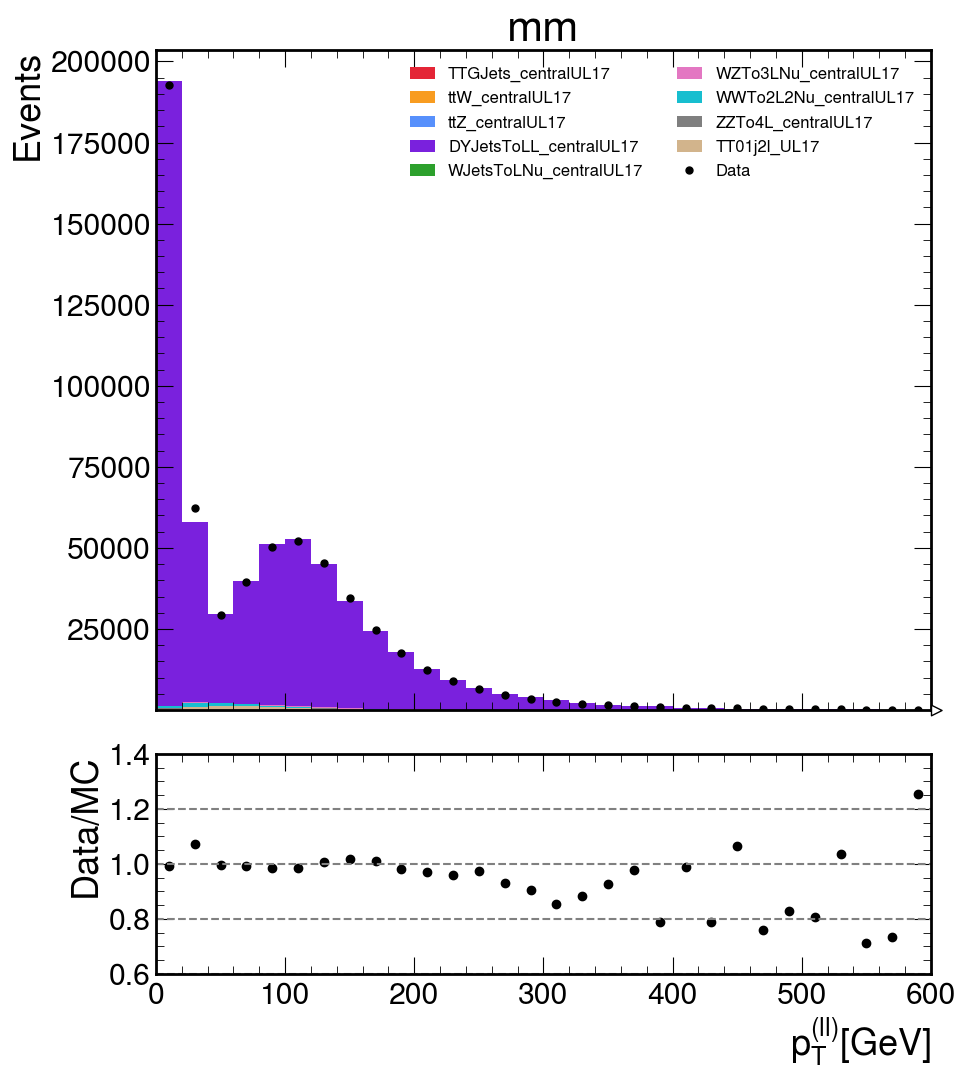

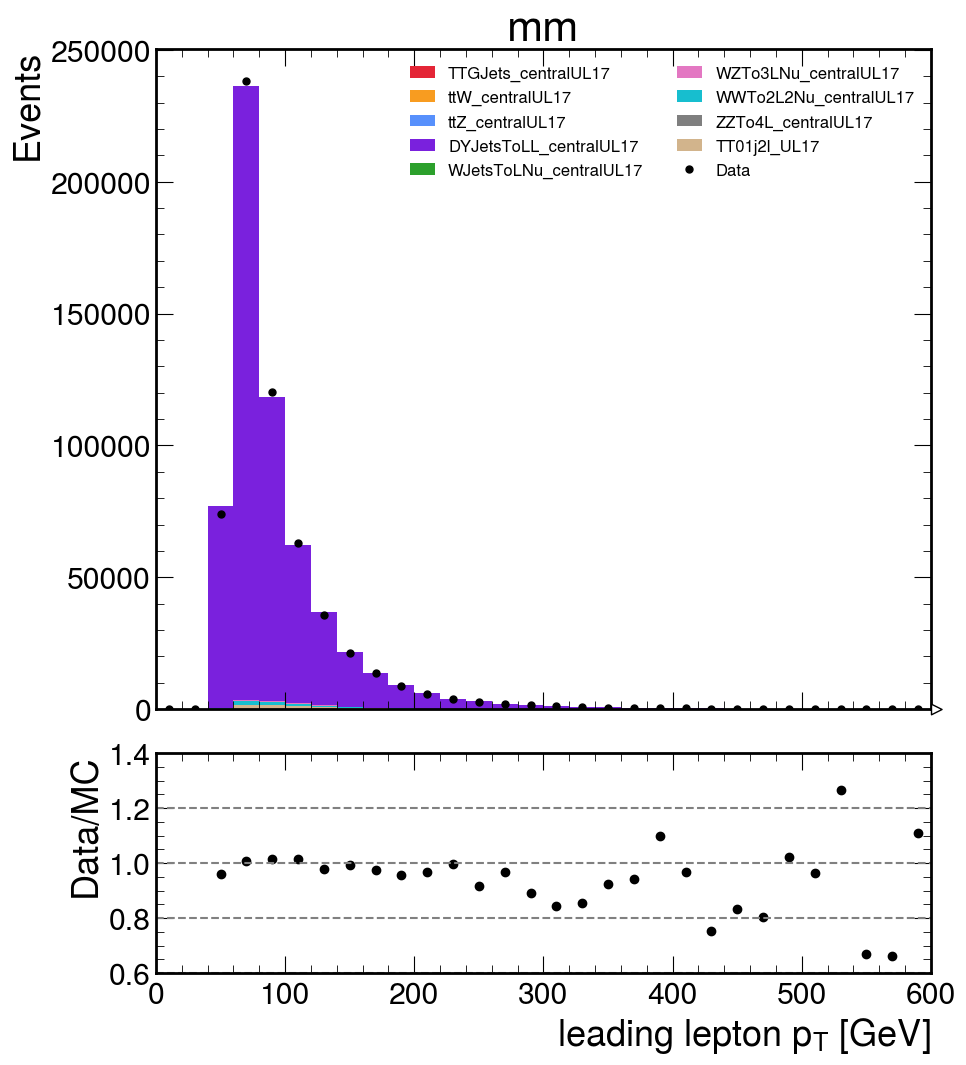

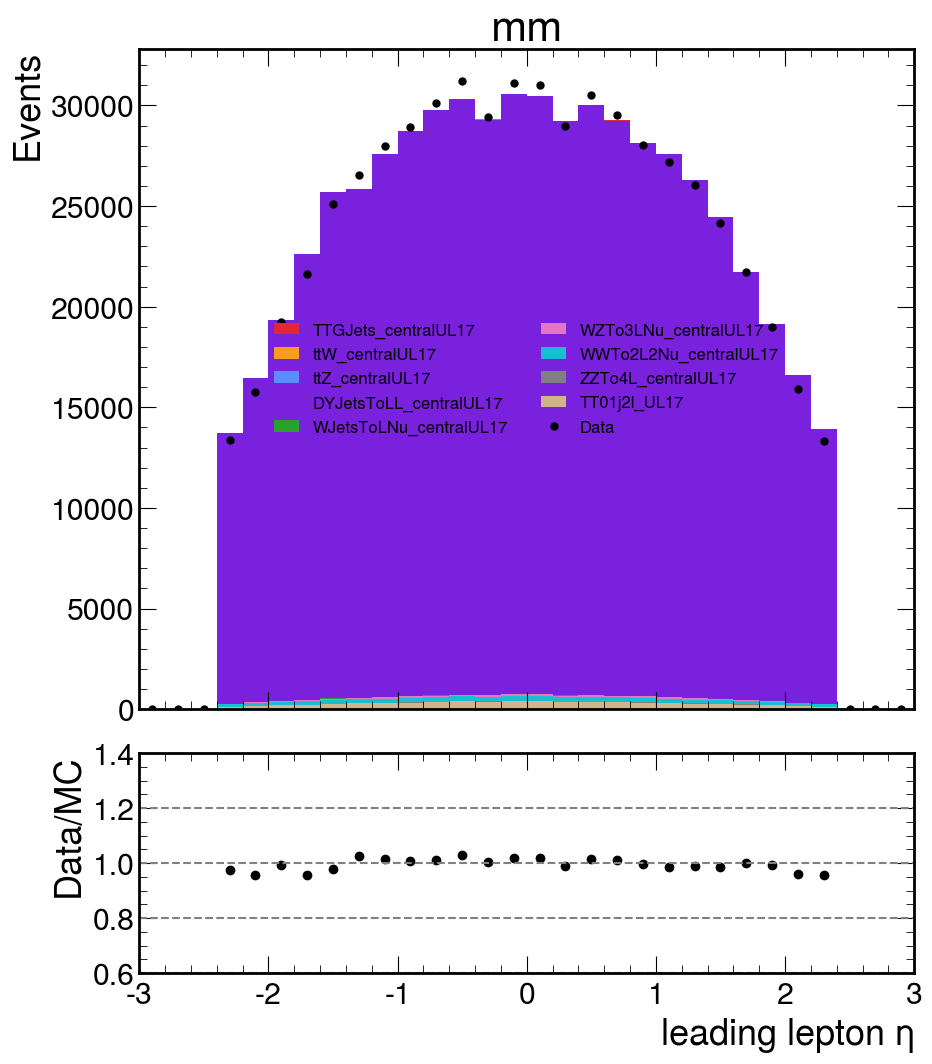

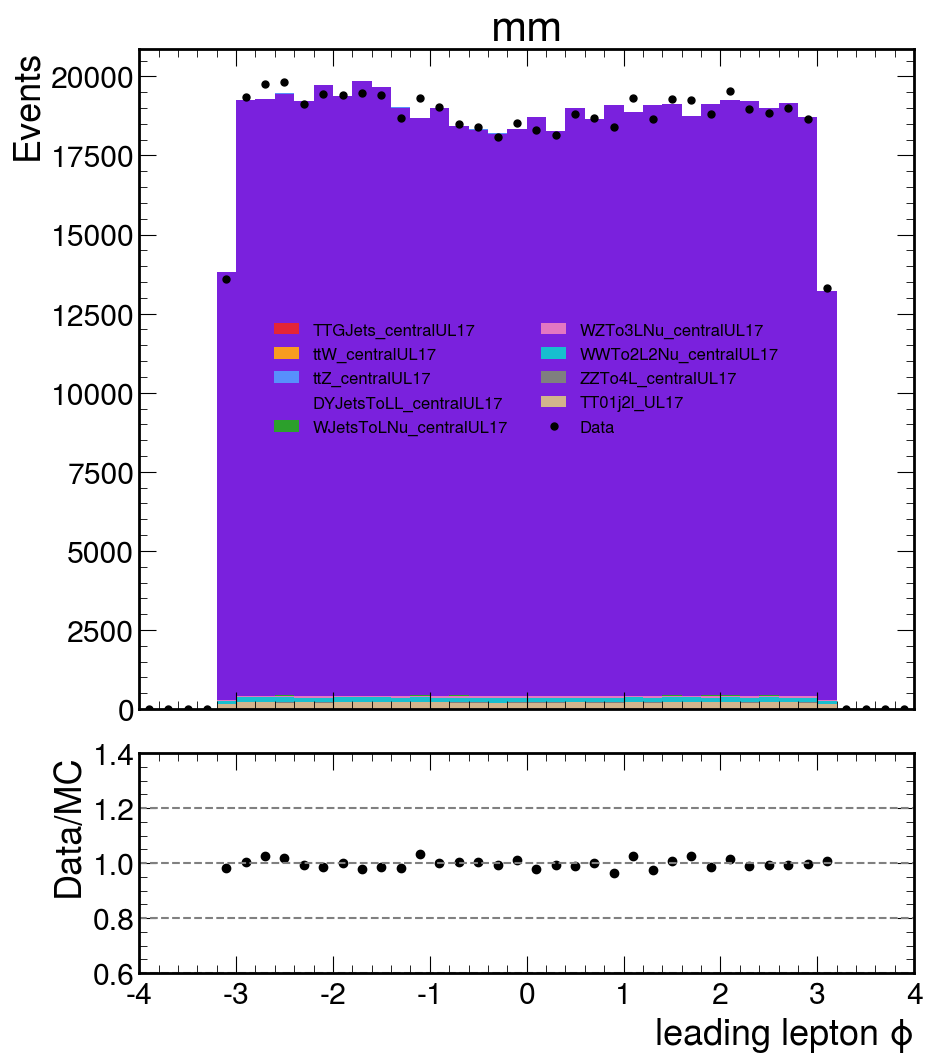

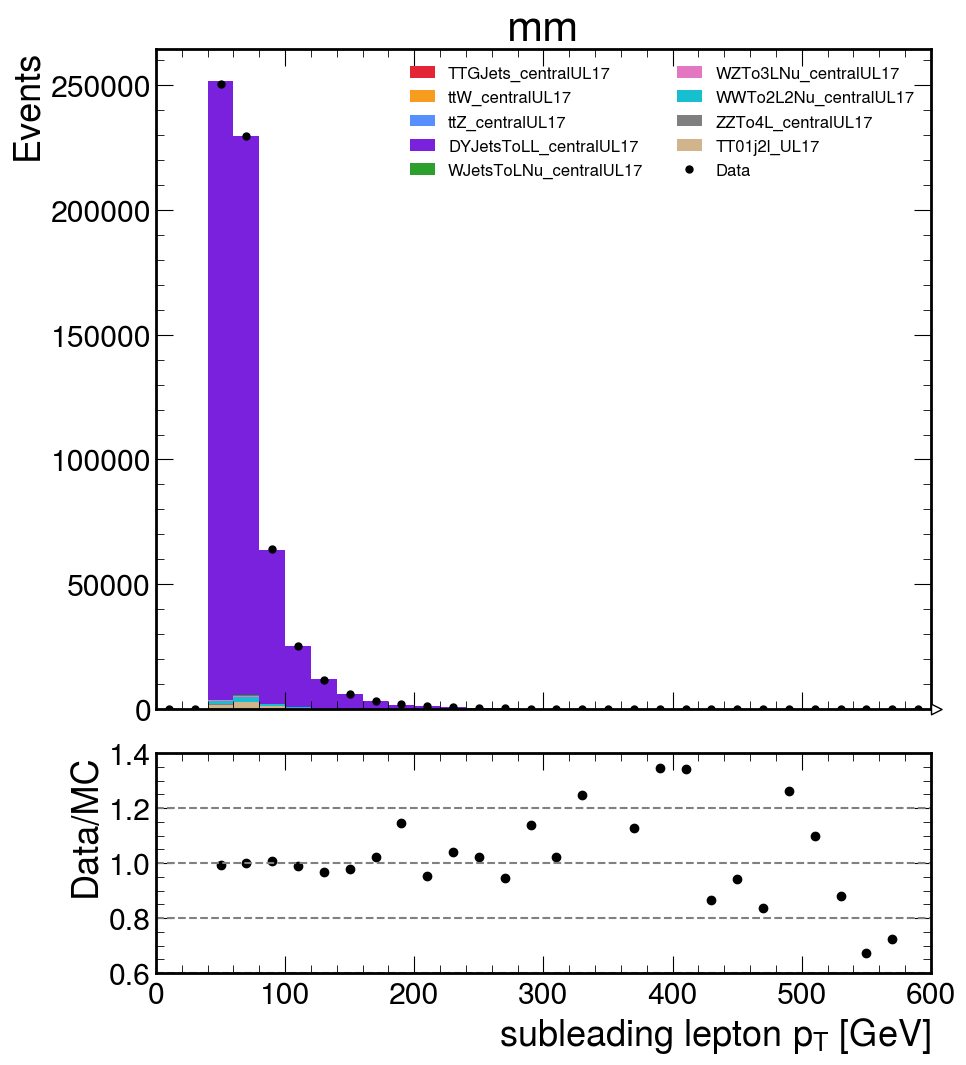

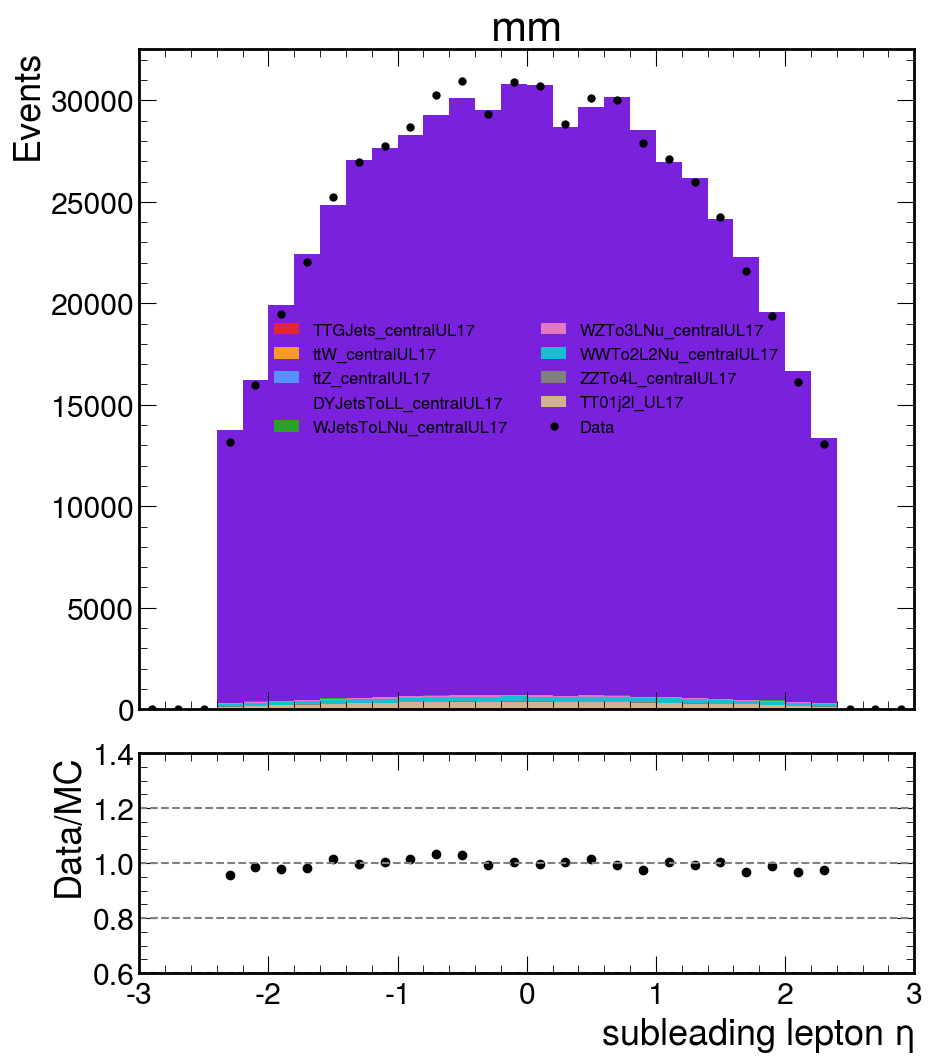

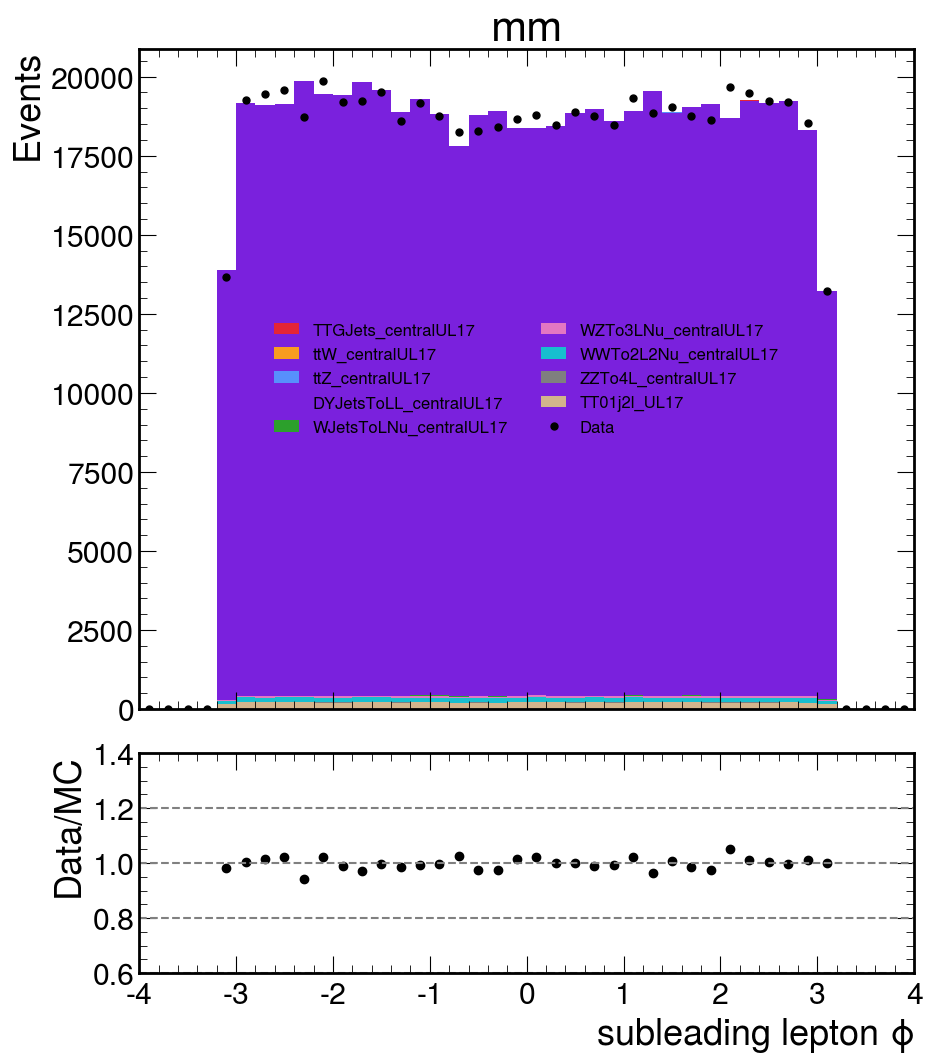

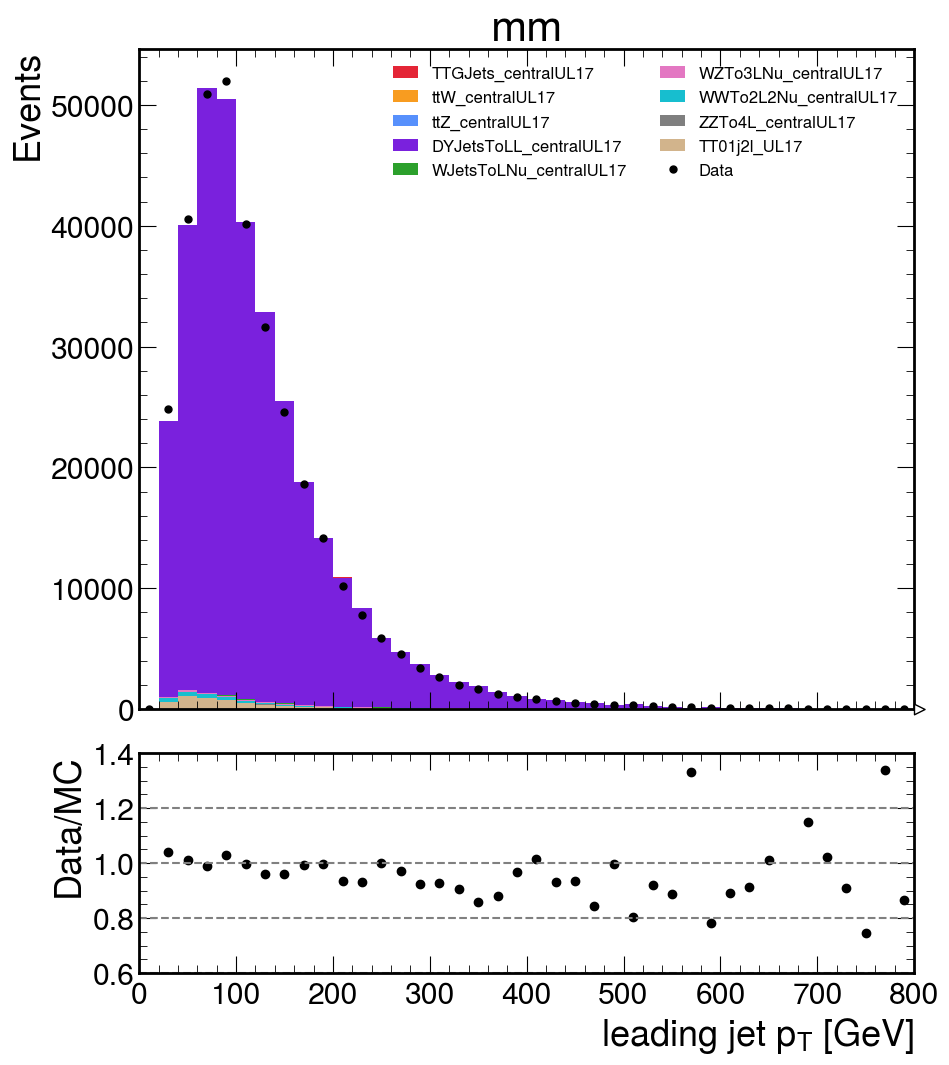

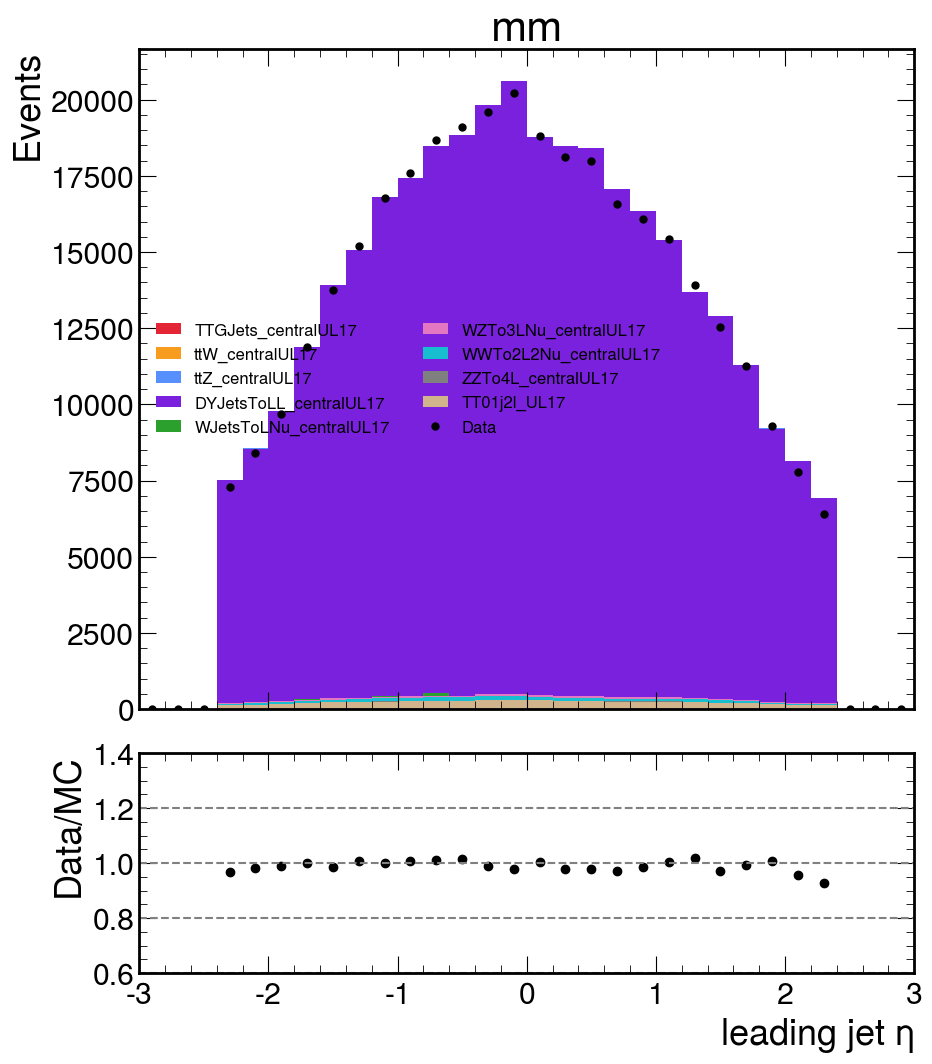

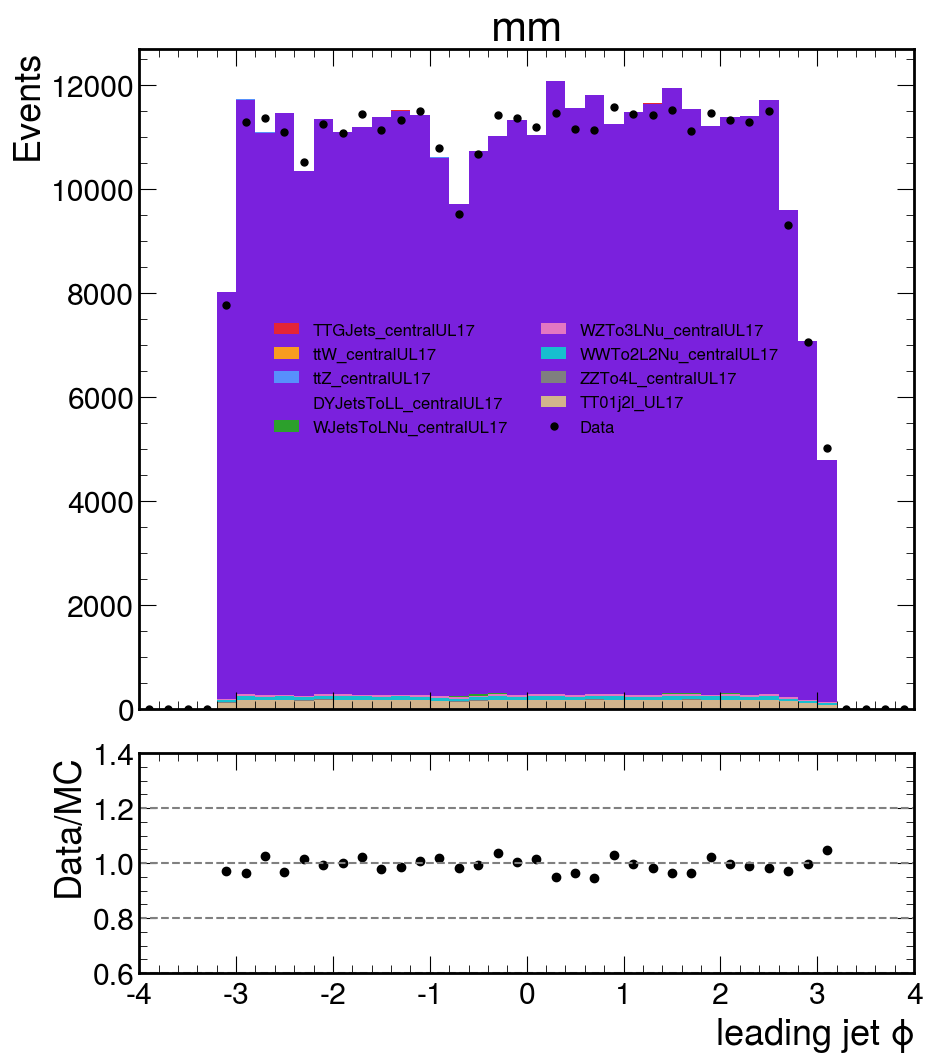

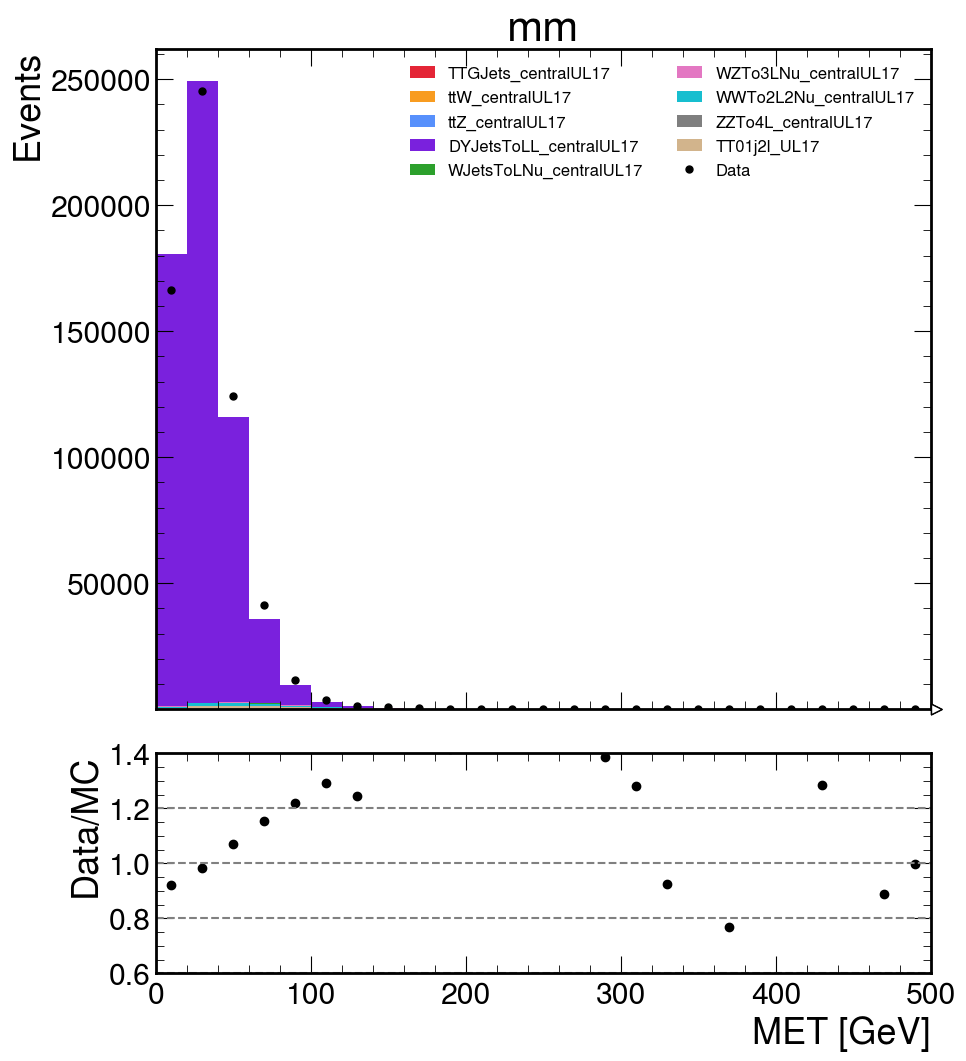

In [22]:
# name = 'l0pt'
for ch in channels: 
    for name in hists_data: 
        
        hep.style.use("CMS")
        
        # colors = ['#e42536', '#f89c20', '#5790fc', '#7a21dd', 'tab:green', 'tab:pink', 'tab:cyan', 'tab:gray'] 
        colors = ['tan', 'tab:gray', 'tab:cyan','tab:pink','tab:green','#7a21dd','#5790fc','#f89c20','#e42536']
        # colors = ["tab:blue", "tab:red"]
        
        h_data = hists_data[name][{'process':sum}].as_hist({})[{'channel':ch}]
        h_background = hists_background[name].as_hist({})[{'channel':ch}]

        # total_background = hists_background[name][{'process':sum}].as_hist({})[{'channel':ch}]
        total_background = h_background[{'process':sum}]

        centers = h_data.axes.centers[0]
        ratio = np.divide(h_data.values(), total_background.values())

        xlabel = h_data.axes.label[0]


        # Initialize figure and axes
        fig, (ax, rax) = plt.subplots(
            nrows=2,
            ncols=1,
            figsize=(10,12),
            gridspec_kw={'height_ratios': (3, 1)},
            sharex=True
        )
        fig.subplots_adjust(hspace=.1)
        ax.set_prop_cycle(cycler(color=colors))

        h_data.plot1d(ax=ax, yerr=False, histtype='errorbar', linewidth=2, label='Data', color='black')
        h_background.plot1d(ax=ax, yerr=False, stack=True, histtype='fill', linewidth=2)

        rax.scatter(centers, ratio, color='black')

        # formatting
        ax.set_ylabel("Events")
        ax.set_xlabel("")
        rax.set_xlabel(xlabel)
        rax.set_ylabel("Data/MC")
        
        ax.set_title(f"{ch}")
        ax.legend(loc='best', ncol=2, fontsize=12)

        rax.set_ylim([0.6, 1.4])
        rax.set_yticks([0.6, 0.8, 1, 1.2, 1.4])
        
        ax.set_xmargin(0)    # makes 0 on x-axis start at left edge
        rax.set_xmargin(0)   # makes 0 on x-axis start at left edge
        
        if "eta" in name: 
            rax.set_xlim([-3, 3])
        elif "phi" in name: 
            rax.set_xlim([-4, 4])
            
        rax.axhline(y=1.0, color='gray', linestyle='--')
        rax.axhline(y=1.2, color='gray', linestyle='--')
        rax.axhline(y=0.8, color='gray', linestyle='--')
        rax.axhline(y=0.6, color='gray', linestyle='--')

In [17]:
# name = 'mll'
# for name in hists: 
#     h_ee = hists_ttbar[name][{'process':sum}].as_hist({})[{'channel':'ee'}]
#     h_mm = hists_ttbar[name][{'process':sum}].as_hist({})[{'channel':'mm'}]

#     hep.style.use("CMS")
#     fig, ax = plt.subplots()
#     h_ee.plot1d(ax=ax, yerr=False, label='ee')
#     h_mm.plot1d(ax=ax, yerr=False, label='mm')
#     ax.legend(loc='best')

In [27]:
# [{'process': sum}]


hists['njets'].as_hist({})[{'channel': 'ee'}]

Hist(
  StrCategory(['TT01j2l_UL17_mtt_0to700'], growth=True, name='process'),
  Regular(10, 0, 10, name='njets'),
  storage=Double()) # Sum: 351719132.6291001